<a href="https://colab.research.google.com/github/junieberry/DL-fromScratch2/blob/main/TermProject/CrushProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project: 대학생처럼 말해보기 - 짝사랑편

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/TermProject

/content/drive/MyDrive/Colab Notebooks/TermProject


In [ ]:
!pip install konlpy
%env JAVA_HOME "C:\Program Files\Java\jdk-14.0.2"

     |████████████████████████████████| 19.4 MB 45.9 MB/s 
     |████████████████████████████████| 448 kB 53.6 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
env: JAVA_HOME="C:\Program Files\Java\jdk-14.0.2"


In [ ]:
import numpy as np
import pandas as pd

import re
import konlpy
from konlpy.tag import Okt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds

## 데이터 전처리

**데이터 정보**

id : 데이터 아이디

input : 에브리타임 게시글 본문

output : 에브리타임 게시글 댓글 목록

In [ ]:
data = pd.read_csv("output.csv")
data

,id,input,output
0,1,"<p class=""large"">그 때 일은 미안해<br/>많이 반성하고 있어<br/...",NaN
1,2,"<p class=""large"">난 늘 같은 마음인데 표현이 부족했던 것 같아<br/...",NaN
2,3,"<p class=""large"">널 좋아하는 내 모습은<br/>내가 원하던 내 모습이...",NaN
3,4,"<p class=""large"">오랫동안 했던 짝사랑이 끝났어<br/>정말 많이 좋아...",NaN
4,5,"<p class=""large"">어제 또또 그인간이 내 프로필 본 티 팍팍 내길래 너...",걍 친삭하셉 영구저4으로 못보게 프로필 차단 안해써? 했는데 그야말로 xx발광을 하...
...,...,...,...
3832,3833,"<p class=""large"">심상치 않은 징조,<br/>심장은 보다 신속.<br/...",거절하겠다 그래서 출석은 언젠대 와 부럽다 아재
3833,3834,"<p class=""large"">하루에도 몇번씩 데이터 끄고 톡 너가 읽었는지 안읽었...",내가 좋아하는사람은 계속 안읽으셔 ㅠ 데이터 키고 확인하면 안뎌? 그럴일 없는거 알...
3834,3835,"<p class=""large"">다시 만날 일 없는 너랑 행복회로 돌리는 날 발견해버...",왜 만난일 없냐 접점이 전혀 없거든 그래도 맘속에 썩히긴 아깝잖아 ㅠㅠ 하지만 전혀...
3835,3836,"<p class=""large"">번호 따인건 난데<br/>내가 더 빠져버렸네</p>",그래도 좋겠다 연락만 잘하면 되니까


### input 중복 제거

In [ ]:
print(data['id'].nunique(), data['input'].nunique(), data['output'].nunique())
data.drop_duplicates(subset=['input'],inplace=True)
print(len(data))

3806 3805 2726


### 정규표현식 사용해 한글만 남기기

In [ ]:
data['input'],data['output'] = data['input'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]",""), data['output'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]"," ")
data

,id,input,output
4,5,어제 또또 그인간이 내 프로필 본 티 팍팍 내길래 너...,걍 친삭하셉 영구저 으로 못보게 프로필 차단 안해써 했는데 그야말로 발광을 하...
5,6,아 ㅈ댓다 만나서 하하호호 밥먹을땐 ...,한벚 더 만나자고 기긱기기 상대쪽이 카톡 먼저 끝내버려서 바로 또 연락하기도 애매해...
6,7,우리의 사랑은 특별한 줄 알았지,안특별하면 뭐어때 뭐때메 안특별한데
7,8,이 글을 네가 보게 될지 모르겠지만 그냥 술먹고 너 ...,미친 눈물나 와 이런 사랑 아프겠지만 해보고 싶다 와따시모 ㅠ진짜 저런 사랑하면 ...
8,9,난 느낌이 좋으면 아무것도 몰라도 마냥 좋은데 ...,너가 다가가야지 그럼 조금만 기다려쥬 ㅇㅈ 너가 좋아하면 너가 다가가야지 상대방은...
...,...,...,...
3832,3833,심상치 않은 징조 심장은 보다 신속 ...,거절하겠다 그래서 출석은 언젠대 와 부럽다 아재
3833,3834,하루에도 몇번씩 데이터 끄고 톡 너가 읽었는지 안읽었...,내가 좋아하는사람은 계속 안읽으셔 ㅠ 데이터 키고 확인하면 안뎌 그럴일 없는거 알...
3834,3835,다시 만날 일 없는 너랑 행복회로 돌리는 날 발견해버...,왜 만난일 없냐 접점이 전혀 없거든 그래도 맘속에 썩히긴 아깝잖아 ㅠㅠ 하지만 전혀...
3835,3836,번호 따인건 난데 내가 더 빠져버렸네,그래도 좋겠다 연락만 잘하면 되니까


### 널 값 삭제

In [ ]:
data = data.dropna(how = 'any')
data

,id,input,output
4,5,어제 또또 그인간이 내 프로필 본 티 팍팍 내길래 너...,걍 친삭하셉 영구저 으로 못보게 프로필 차단 안해써 했는데 그야말로 발광을 하...
5,6,아 ㅈ댓다 만나서 하하호호 밥먹을땐 ...,한벚 더 만나자고 기긱기기 상대쪽이 카톡 먼저 끝내버려서 바로 또 연락하기도 애매해...
6,7,우리의 사랑은 특별한 줄 알았지,안특별하면 뭐어때 뭐때메 안특별한데
7,8,이 글을 네가 보게 될지 모르겠지만 그냥 술먹고 너 ...,미친 눈물나 와 이런 사랑 아프겠지만 해보고 싶다 와따시모 ㅠ진짜 저런 사랑하면 ...
8,9,난 느낌이 좋으면 아무것도 몰라도 마냥 좋은데 ...,너가 다가가야지 그럼 조금만 기다려쥬 ㅇㅈ 너가 좋아하면 너가 다가가야지 상대방은...
...,...,...,...
3832,3833,심상치 않은 징조 심장은 보다 신속 ...,거절하겠다 그래서 출석은 언젠대 와 부럽다 아재
3833,3834,하루에도 몇번씩 데이터 끄고 톡 너가 읽었는지 안읽었...,내가 좋아하는사람은 계속 안읽으셔 ㅠ 데이터 키고 확인하면 안뎌 그럴일 없는거 알...
3834,3835,다시 만날 일 없는 너랑 행복회로 돌리는 날 발견해버...,왜 만난일 없냐 접점이 전혀 없거든 그래도 맘속에 썩히긴 아깝잖아 ㅠㅠ 하지만 전혀...
3835,3836,번호 따인건 난데 내가 더 빠져버렸네,그래도 좋겠다 연락만 잘하면 되니까


### 앞 뒤 공백 제거

In [ ]:
data['input'], data['output'] = data['input'].str.strip() , data['output'].str.strip()

## 서브워드텍스트인코더를 사용해 단어 집합 생성

- https://wikidocs.net/86792
- 단어를 서브 워드로 분리해줌

In [ ]:
# 서브워드텍스트인코더를 사용하여 단어 집합(Vocabulary) 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data['input']+data['output'], target_vocab_size=2**13)

# 시작 토큰과 종료 토큰에 대한 정수 부여.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
VOCAB_SIZE = tokenizer.vocab_size + 2

print('단어 집합의 크기 :',VOCAB_SIZE)

단어 집합의 크기 : 7573


In [ ]:
sample_string = data['input'][20]

# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print ('인코딩 후의 문장 {}'.format(tokenized_string))

# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print ('디코딩 후의 문장: {}'.format(original_string))

for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

인코딩 후의 문장 [412, 568, 162, 3296, 4956, 7347, 216, 1245]
디코딩 후의 문장: 여기 다들 짝사랑 상대 좋아한지 얼마나 됨
412 ----> 여기 
568 ----> 다들 
162 ----> 짝사랑 
3296 ----> 상대 
4956 ----> 좋아한지
7347 ---->  
216 ----> 얼마나 
1245 ----> 됨


### 정수 인코딩 및 패딩

게시글의 최대 길이 : 7758
게시글의 평균 길이 : 70.58330321647995


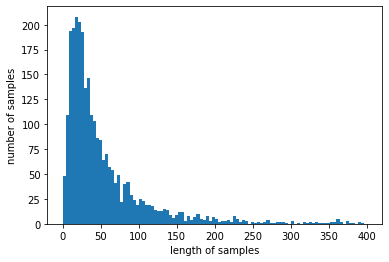

In [ ]:
print('게시글의 최대 길이 :',max(len(l) for l in data['input']))
print('게시글의 평균 길이 :',sum(map(len, data['input']))/len(data['input']))

plt.hist([len(s) for s in data['input']], range=(0,400), bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

게시글의 최대 길이 : 2856
게시글의 평균 길이 : 68.84098301409469


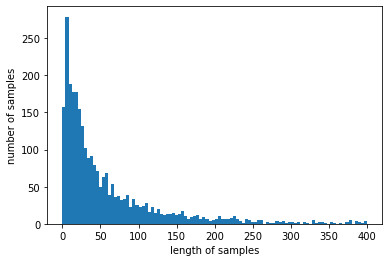

In [ ]:
print('게시글의 최대 길이 :',max(len(l) for l in data['output']))
print('게시글의 평균 길이 :',sum(map(len, data['output']))/len(data['output']))

plt.hist([len(s) for s in data['output']],range=(0,400), bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

글들이 왜이렇게 길까요? 일단 100으로 패딩하겠습니다

In [ ]:
MAX_LENGTH = 100

def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []

  ## 정수 인코딩
  for (sentence1, sentence2) in zip(inputs, outputs):
    # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    tokenized_inputs.append(sentence1)
    tokenized_outputs.append(sentence2)

  # 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

  return tokenized_inputs, tokenized_outputs

In [ ]:
inputs, outputs = tokenize_and_filter(data['input'], data['output'])
print('input shape >> ',inputs.shape)
print('output shape >> ',outputs.shape)

input shape >>  (2767, 100)
output shape >>  (2767, 100)
